# Rotor Temperature Prediction


The goal of this project is to predict the Permanent Magnet Temperature of Electric Motor using various Machine Learning Regression Algorithms.

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset 

In [2]:
df = pd.read_csv("electric_motor_temperature.csv") 
df.head()

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,torque,profile_id,stator_winding,stator_tooth,stator_yoke,pm
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,19.850691,0.187101,17,19.086670,18.293219,18.316547,24.554214
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,19.850672,0.245417,17,19.092390,18.294807,18.314955,24.538078
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,19.850657,0.176615,17,19.089380,18.294094,18.326307,24.544693
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,19.850647,0.238303,17,19.083031,18.292541,18.330833,24.554018
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,19.850639,0.208197,17,19.082525,18.291428,18.326662,24.565397


In [3]:
df.shape

(1048575, 13)

In [4]:
df.columns

Index(['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient',
       'torque', 'profile_id', 'stator_winding', 'stator_tooth', 'stator_yoke',
       'pm'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1048575 non-null  float64
 1   coolant         1048575 non-null  float64
 2   u_d             1048575 non-null  float64
 3   motor_speed     1048575 non-null  float64
 4   i_d             1048575 non-null  float64
 5   i_q             1048575 non-null  float64
 6   ambient         1048575 non-null  float64
 7   torque          1048575 non-null  float64
 8   profile_id      1048575 non-null  int64  
 9   stator_winding  1048575 non-null  float64
 10  stator_tooth    1048575 non-null  float64
 11  stator_yoke     1048575 non-null  float64
 12  pm              1048575 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 104.0 MB


## Descriptive Data Analysis 

In [6]:
df.describe()

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,torque,profile_id,stator_winding,stator_tooth,stator_yoke,pm
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.333733e+01,3.232322e+01,-2.899370e+01,2.209956e+03,-7.092833e+01,4.330229e+01,2.423961e+01,3.623050e+01,3.549608e+01,6.430889e+01,5.439572e+01,4.525002e+01,5.691077e+01
std,4.336464e+01,2.027951e+01,6.223175e+01,1.874061e+03,6.660061e+01,9.159176e+01,1.940425e+00,7.673032e+01,2.506011e+01,2.968288e+01,2.323587e+01,1.948673e+01,2.001114e+01
min,-2.529093e+01,1.376190e+01,-1.315304e+02,-2.755491e+02,-2.780036e+02,-2.934268e+02,1.410069e+01,-2.464667e+02,2.000000e+00,1.858582e+01,1.813398e+01,1.807669e+01,2.085696e+01
25%,1.209668e+01,1.860544e+01,-8.525315e+01,3.836995e+02,-1.192647e+02,1.096400e+00,2.309487e+01,-4.055462e-02,1.400000e+01,3.937440e+01,3.334926e+01,2.877491e+01,3.900360e+01
50%,4.752466e+01,1.926167e+01,-7.620751e+00,1.999976e+03,-5.073550e+01,2.992396e+01,2.411081e+01,2.089365e+01,2.900000e+01,6.356562e+01,5.260343e+01,3.972105e+01,5.760014e+01
75%,8.757509e+01,4.179416e+01,8.295827e-01,3.749966e+03,-2.980322e+00,1.131816e+02,2.591768e+01,9.801524e+01,5.700000e+01,8.764565e+01,7.212174e+01,5.869643e+01,7.169332e+01
max,1.330313e+02,1.015985e+02,1.314698e+02,6.000015e+03,5.189670e-02,3.017079e+02,3.071420e+01,2.610057e+02,8.100000e+01,1.413629e+02,1.119464e+02,9.985647e+01,1.136066e+02


In [7]:
# There are no missing values in the dataset.
df.isnull().sum()

u_q               0
coolant           0
u_d               0
motor_speed       0
i_d               0
i_q               0
ambient           0
torque            0
profile_id        0
stator_winding    0
stator_tooth      0
stator_yoke       0
pm                0
dtype: int64

In [8]:
df_test = df[(df['profile_id'] == 65) | (df['profile_id'] == 72)]
df = df[(df['profile_id'] != 65) & (df['profile_id'] != 72)]

<AxesSubplot:>

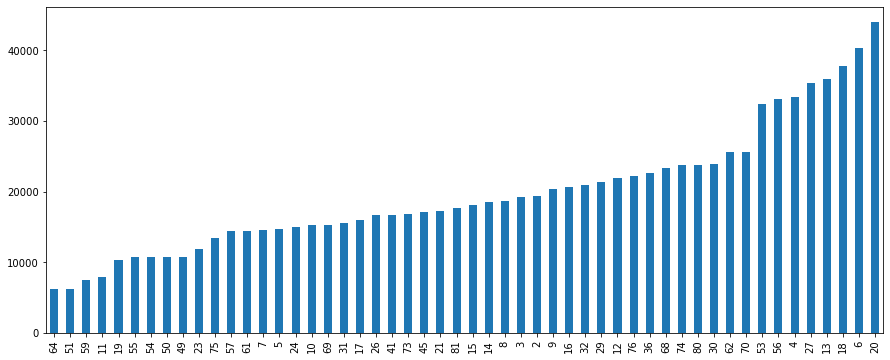

In [9]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

As we can see, session ids 66, 6 and 20 have the most number of measurements recorded.

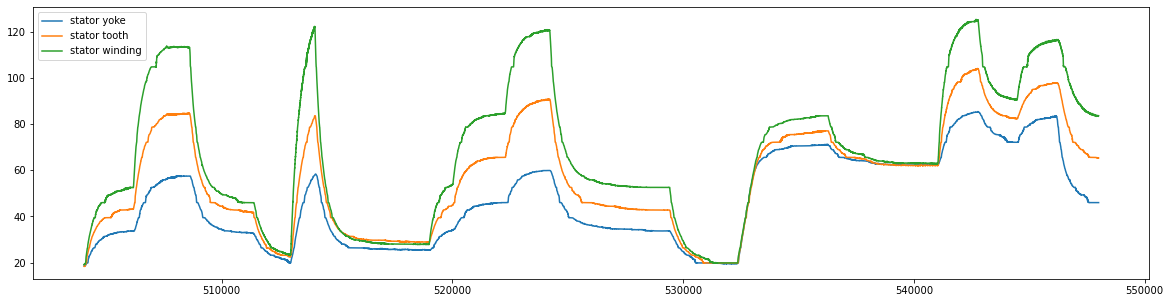

In [10]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend()

As we can see from the plot, all three stator components follow a similar measurment variance.

As the dataset author mentioned, the records in the same profile id have been sorted by time, we can assume that these recordings have been arranged in series of time.

Due to this we can infer that there has not been much time given for the motor to cool down in between recording the sensor data as we can see that initially the stator yoke temperature is low as compared to temperature of stator winding but as we progress in time, the stator yoke temperature goes above the temperature of stator winding.

In [11]:
# As profile_id is an id for each measurement session, we can remove it from any furthur analysis and model building.
df.drop('profile_id',axis = 1,inplace=True)
df_test.drop('profile_id',axis = 1,inplace=True)

In [12]:
df.head()

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,torque,stator_winding,stator_tooth,stator_yoke,pm
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,19.850691,0.187101,19.086670,18.293219,18.316547,24.554214
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,19.850672,0.245417,19.092390,18.294807,18.314955,24.538078
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,19.850657,0.176615,19.089380,18.294094,18.326307,24.544693
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,19.850647,0.238303,19.083031,18.292541,18.330833,24.554018
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,19.850639,0.208197,19.082525,18.291428,18.326662,24.565397


## Data Visualization 

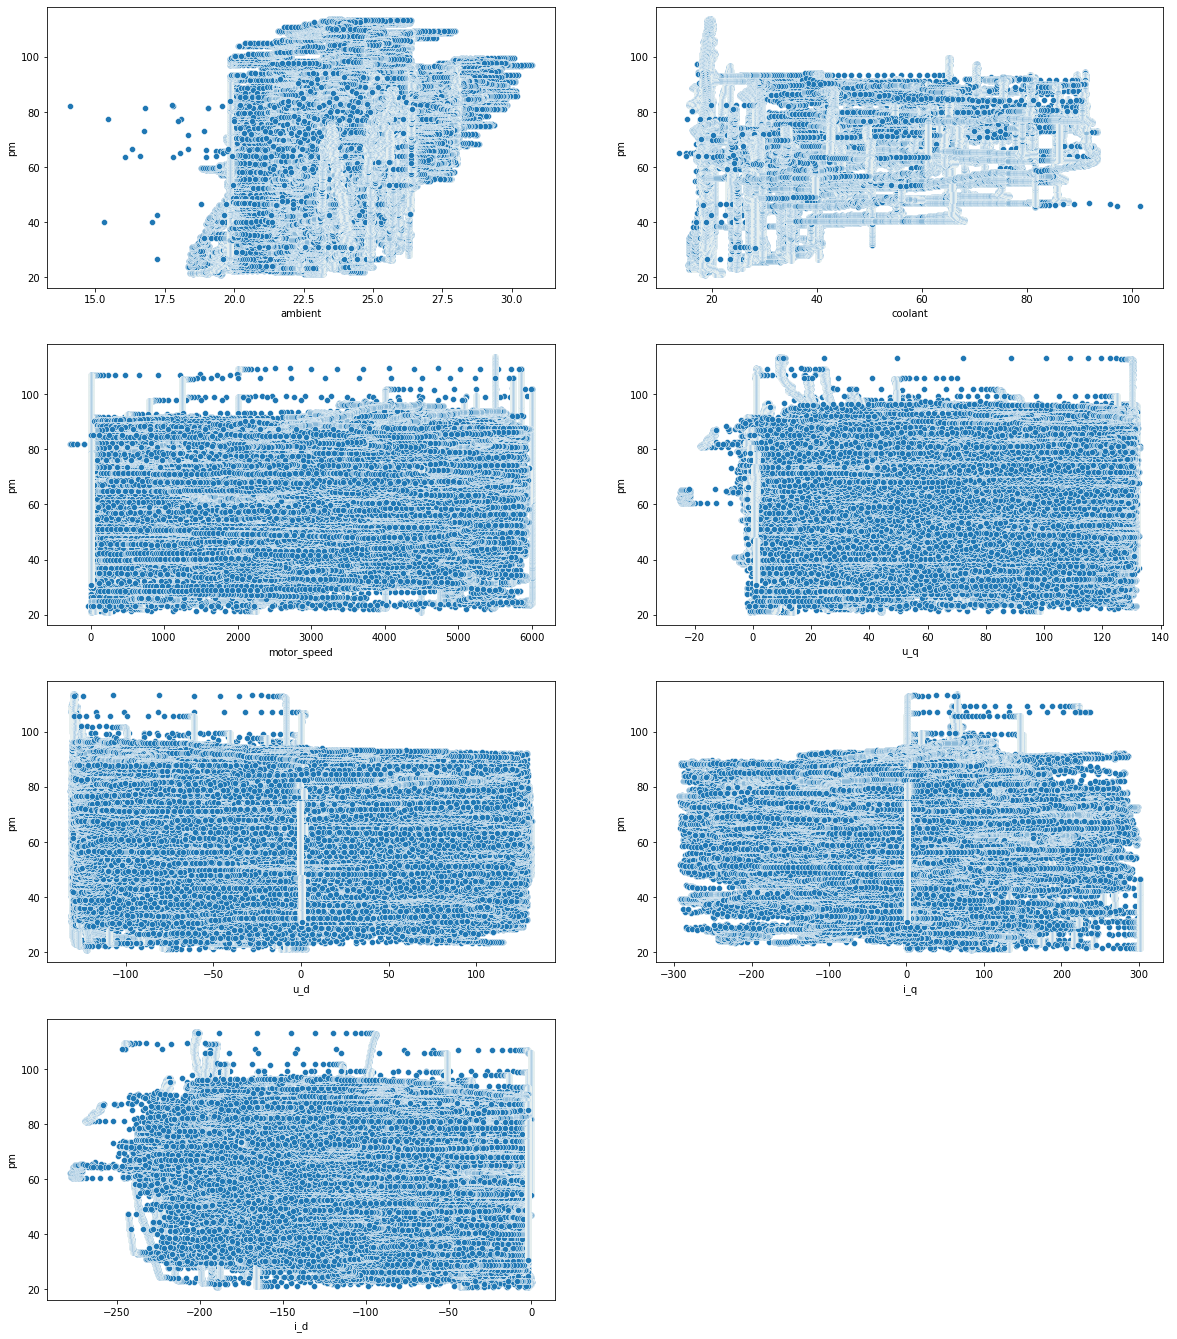

In [13]:
plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
sns.scatterplot(data=df, x = 'ambient', y = 'pm')
plt.subplot(5,2,2)
sns.scatterplot(data=df, x = 'coolant', y = 'pm')
plt.subplot(5,2,3)
sns.scatterplot(data=df, x = 'motor_speed', y = 'pm')
plt.subplot(5,2,4)
sns.scatterplot(data=df, x = 'u_q', y = 'pm')
plt.subplot(5,2,5)
sns.scatterplot(data=df, x = 'u_d', y = 'pm')
plt.subplot(5,2,6)
sns.scatterplot(data=df, x = 'i_q', y = 'pm')
plt.subplot(5,2,7)
sns.scatterplot(data=df, x = 'i_d', y = 'pm')
plt.show()

## Extract the independent (input) and dependent (output) variable 

In [14]:
# extracting independent variable
X = df.iloc[:,:-1].values
# extracting dependent variable
Y = df.iloc[:,-1].values 
print(X.shape)
print(Y.shape)

(1027193, 11)
(1027193,)


## Splitting the dataset into the Training and Testing sets 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(719035, 11) (719035,)
(308158, 11) (308158,)


## Normalization of Dataset 

In [16]:
# bringing all the features into same range to perform valid predictions
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # 0 : 1
X_train =mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)
print(X_train, X_test)

[[0.25857385 0.06191257 0.49199781 ... 0.04347583 0.05135693 0.04052693]
 [0.822065   0.46825414 0.2045514  ... 0.53562409 0.62067096 0.62037015]
 [0.15011064 0.05072857 0.49877282 ... 0.16212565 0.16259184 0.13379063]
 ...
 [0.17628916 0.09322806 0.00213352 ... 0.86228269 0.7757001  0.54456043]
 [0.33337004 0.06310543 0.0119844  ... 0.69026175 0.6281425  0.43010106]
 [0.71640122 0.81499287 0.2719933  ... 0.53477012 0.66238911 0.75534883]] [[0.90461474 0.06093945 0.49632792 ... 0.5061264  0.51192223 0.39428375]
 [0.61714958 0.05094321 0.08849458 ... 0.20566215 0.18496056 0.09756072]
 [0.2467536  0.04830434 0.45568387 ... 0.16914532 0.14398092 0.10213074]
 ...
 [0.91129495 0.9198985  0.28920217 ... 0.41728514 0.55862378 0.66062683]
 [0.48439496 0.04817282 0.27442453 ... 0.28116686 0.26863531 0.2001053 ]
 [0.91688903 0.04610543 0.4969921  ... 0.06412731 0.10503073 0.08306809]]


In [17]:
print(Y_train, Y_test)

[31.50115967 72.18869319 51.21005249 ... 84.89156342 72.7546463
 57.4077488 ] [64.18056488 53.0327339  30.64031601 ... 62.51238184 59.42392349
 37.11608887]


## Training dataset with Regression Models

Here, 4 regression models were used to predict the PM temperature:
1. Linear Regression Model
2. K-Nearest Neighbour Regressor 
3. XGBoost Regressor
4. AdaBoost Regressor

## Importing Libraries 

In [18]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

## Linear Regression Model

In [19]:
l_reg = LinearRegression()
l_reg.fit(X_train,Y_train)

l_train_acc = (l_reg.score(X_train,Y_train))*100
l_test_acc = (l_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {l_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {l_test_acc}")

Train accuracy: 87.43191532899878
Test accuracy: 87.21740880261099


In [20]:
Y_pred = l_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(308158,) (308158,)


In [21]:
r2_l = r2_score(Y_test, Y_pred)*100
rms_l = sqrt(mean_squared_error(Y_test, Y_pred))
mae_l = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_l} %")
print(f"Root mean squared error is {rms_l}")
print(f"Mean absolute error is {mae_l}")

R^2 score of model is 87.21740880261099 %
Root mean squared error is 7.217678578109608
Mean absolute error is 5.3199636696320844


### Performing KFold Cross-Validation (CV) 

In [22]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(l_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = l_reg.predict(X_test)
r2_l_cv = sklearn.metrics.r2_score(Y_test, Y_pred)*100
print(f'R^2 Score: {r2_l_cv} %')

Score Array list: [0.87569012 0.87368931 0.87361805 0.87296294 0.87522526 0.87592541
 0.87275335 0.87470138 0.87442342 0.87411797]


R^2 Score: 87.21740880261099 %


### Evaluation Table 

In [23]:
calculation = pd.DataFrame(np.c_[Y_test,l_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,64.180565,68.973444
1,53.032734,51.612811
2,30.640316,35.250218
3,48.364330,46.316620
4,27.405792,25.725593


### Visualizing the test results 

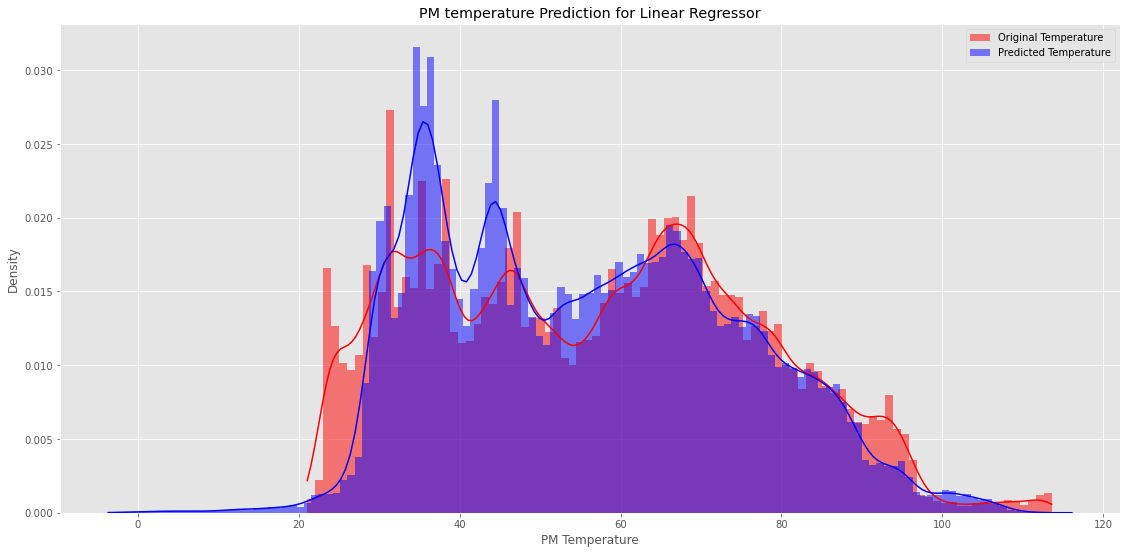

In [24]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Linear Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

## K-Nearest Neighbour Regressor 

In [26]:
k_reg = KNeighborsRegressor(n_neighbors=10,p=2,metric='minkowski')
k_reg.fit(X_train,Y_train)

k_train_acc = (k_reg.score(X_train,Y_train))*100
k_test_acc = (k_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {k_train_acc}")
print(f"Test accuracy: {k_test_acc}")

Train accuracy: 99.66619994125837
Test accuracy: 97.93471827160181


In [27]:
Y_pred = k_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(308158,) (308158,)


In [28]:
r2_k = r2_score(Y_test, Y_pred)*100
rms_k = sqrt(mean_squared_error(Y_test, Y_pred))
mae_k = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_k} %")
print(f"Root mean squared error is {rms_k}")
print(f"Mean absolute error is {mae_k}")

R^2 score of model is 97.93471827160181 %
Root mean squared error is 2.901200471540669
Mean absolute error is 1.2826302014592643


### Performing KFold Cross-Validation (CV) 

In [29]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
k_reg = KNeighborsRegressor()
k_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(k_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = k_reg.predict(X_test)
r2_k_cv = sklearn.metrics.r2_score(Y_test, Y_pred)*100
print(f'R^2 Score: {r2_k_cv} %')

Score Array list: [0.99691045 0.99701071 0.99686197 0.99694802 0.99693773 0.99706387
 0.99682256 0.99686349 0.99667262 0.99712081]


R^2 Score: 97.98423906849443 %


### Evaluation and Visualization

In [30]:
calculation = pd.DataFrame(np.c_[Y_test,k_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,64.180565,64.170238
1,53.032734,53.146353
2,30.640316,29.345552
3,48.364330,48.609483
4,27.405792,27.137379


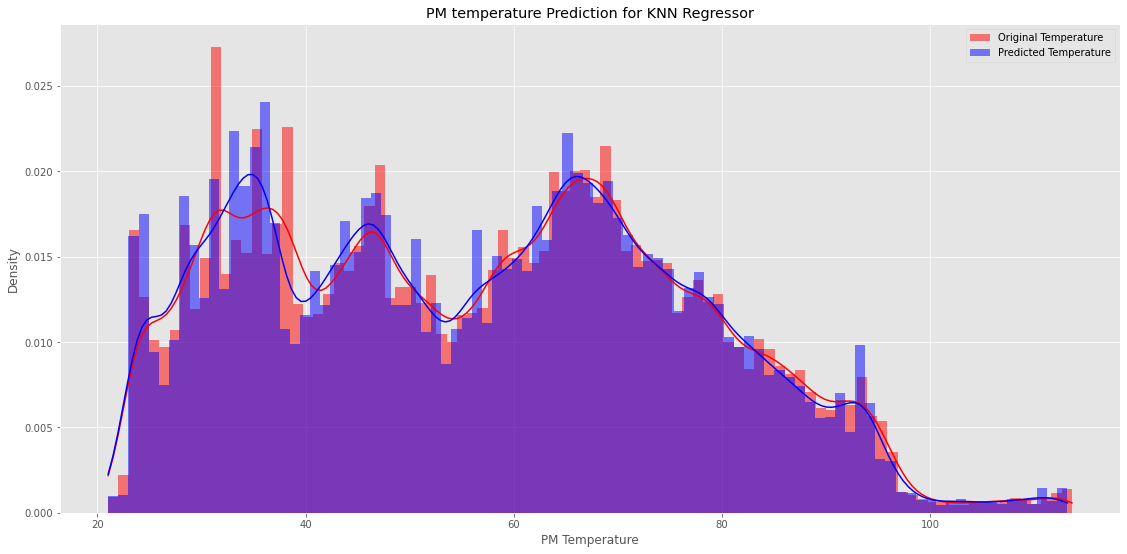

In [31]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for KNN Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

## XGBoost Regressor 

In [32]:
x_reg = XGBRegressor()
x_reg.fit(X_train,Y_train)

x_train_acc = (x_reg.score(X_train,Y_train))*100
x_test_acc = (x_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {x_train_acc}")
print(f"Test accuracy: {x_test_acc}")

Train accuracy: 98.92449113134552
Test accuracy: 94.69296937778357


In [33]:
Y_pred = x_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(308158,) (308158,)


In [34]:
r2_x = r2_score(Y_test, Y_pred)*100
rms_x = sqrt(mean_squared_error(Y_test, Y_pred))
mae_x = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_x} %")
print(f"Root mean squared error is {rms_x}")
print(f"Mean absolute error is {mae_x}")

R^2 score of model is 94.69296937778357 %
Root mean squared error is 4.650652444353737
Mean absolute error is 3.147235129898032


### Performing KFold Cross-Validation (CV)

In [35]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
x_reg = XGBRegressor()
x_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(x_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = x_reg.predict(X_test)
r2_x_cv = sklearn.metrics.r2_score(Y_test, Y_pred)*100
print(f'R^2 Score: {r2_x_cv} %')

Score Array list: [0.98862739 0.98854197 0.98911797 0.98855671 0.98874237 0.98929033
 0.98857051 0.98889691 0.98832604 0.98880152]


R^2 Score: 94.69296937778357 %


### Evaluation and Visualization 

In [36]:
calculation = pd.DataFrame(np.c_[Y_test,x_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,64.180565,64.497192
1,53.032734,50.209435
2,30.640316,31.738216
3,48.364330,47.477741
4,27.405792,28.043987


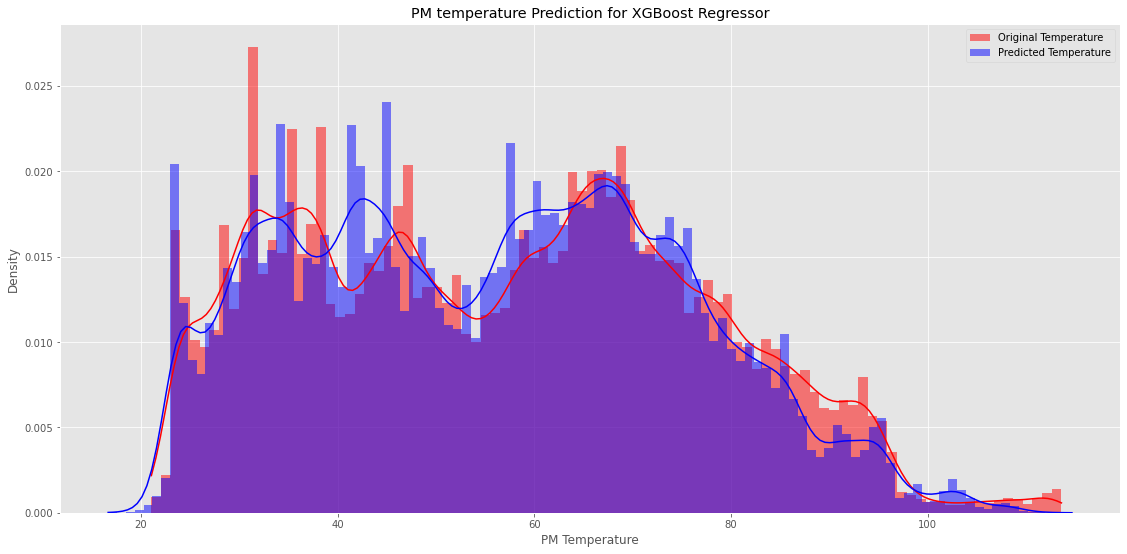

In [37]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for XGBoost Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

## AdaBoost Regressor 

In [38]:
dtree = DecisionTreeRegressor()
a_reg = AdaBoostRegressor(n_estimators=100, base_estimator=dtree,learning_rate=1)
a_reg.fit(X_train, Y_train)

a_train_acc = (a_reg.score(X_train,Y_train))*100
a_test_acc = (a_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {a_train_acc}")
print(f"Test accuracy: {a_test_acc}")

Train accuracy: 99.99999603157323
Test accuracy: 95.78132421470085


In [39]:
Y_pred = a_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)

(308158,) (308158,)


In [40]:
r2_a = r2_score(Y_test, Y_pred)*100
rms_a = sqrt(mean_squared_error(Y_test, Y_pred))
mae_a = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_a} %")
print(f"Root mean squared error is {rms_a}")
print(f"Mean absolute error is {mae_a}")

R^2 score of model is 95.78132421470085 %
Root mean squared error is 4.146447424348727
Mean absolute error is 1.816462384646145


### Performing KFold Cross-Validation (CV) 

In [43]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
a_reg = AdaBoostRegressor()
a_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(a_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred = a_reg.predict(X_test)
r2_a_cv = sklearn.metrics.r2_score(Y_test, Y_pred)*100
print(f'R^2 Score: {r2_a_cv} %')

Score Array list: [0.78979644 0.79208201 0.79590061 0.79334902 0.7881298  0.79232197
 0.78746191 0.79401431 0.78648068 0.7974361 ]


R^2 Score: 78.51327524811254 %


### Evaluation and Visualization 

In [44]:
calculation = pd.DataFrame(np.c_[Y_test,a_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)

,Original Temperature,Predicted Temperature
0,64.180565,70.299066
1,53.032734,48.320183
2,30.640316,40.258230
3,48.364330,55.731107
4,27.405792,39.157735


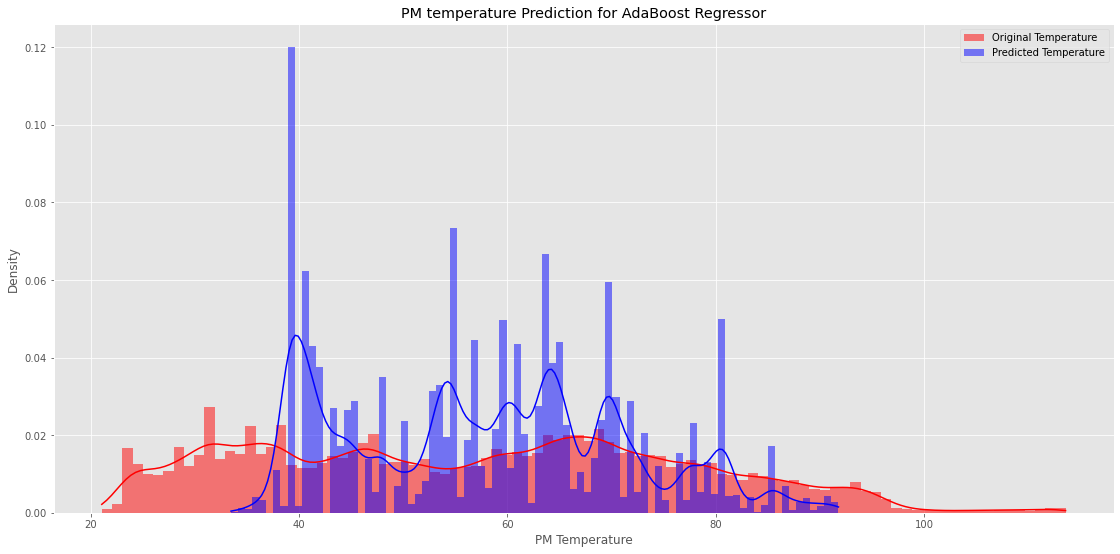

In [45]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for AdaBoost Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

## Evaluation Table 

In [53]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','XGBoost Regressor', 
             'AdaBoost Regressor',  'K-Nearest Neighbours Regressor'],
    'Training Accuracy' : [l_train_acc, x_train_acc, a_train_acc, k_train_acc],
    'Testing Auracy' : [l_test_acc, x_test_acc, a_test_acc, k_test_acc],
    'RMS Score' : [rms_l, rms_x, rms_a, rms_k],
    'MAE Score' : [mae_l, mae_x, mae_a, mae_k],
    'R^2 Score': [ r2_l, r2_x, r2_a, r2_k],
    'CV R^2 Score': [r2_l_cv, r2_x_cv, r2_a_cv, r2_k_cv]
})

models.sort_values(by = ['Training Accuracy', 'Testing Auracy', 'RMS Score', 'MAE Score', 'R^2 Score','CV R^2 Score'], 
                   ascending = True)

,Algorithm,Training Accuracy,Testing Auracy,RMS Score,MAE Score,R^2 Score,CV R^2 Score
0,Linear Regression,87.431915,87.217409,7.217679,5.319964,87.217409,87.217409
1,XGBoost Regressor,98.924491,94.692969,4.650652,3.147235,94.692969,94.692969
3,K-Nearest Neighbours Regressor,99.666200,97.934718,2.901200,1.282630,97.934718,97.984239
2,AdaBoost Regressor,99.999996,95.781324,4.146447,1.816462,95.781324,78.513275


## Comaprison Graphs 

### Algorithm vs. R^2 Score  

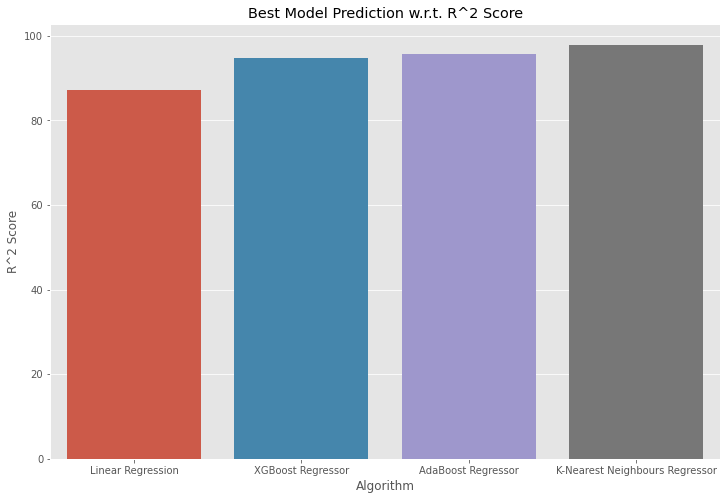

In [54]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.show()

### Algorithm vs. CV R^2 Score  

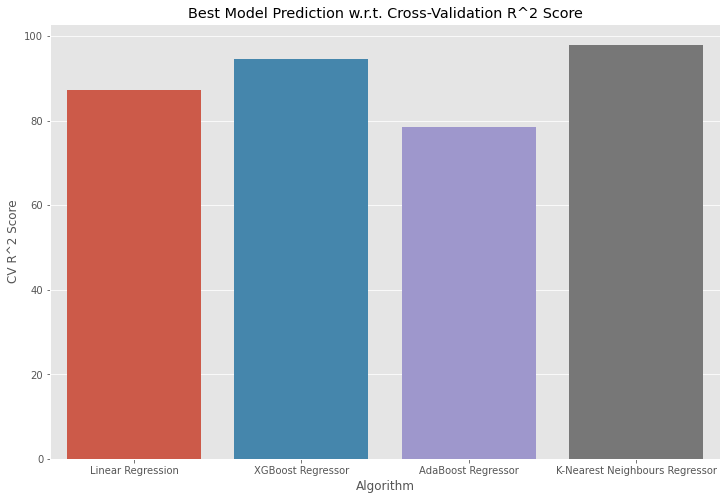

In [55]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='CV R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. Cross-Validation R^2 Score") 
plt.show()

### Algorithm vs. Training Accuracy

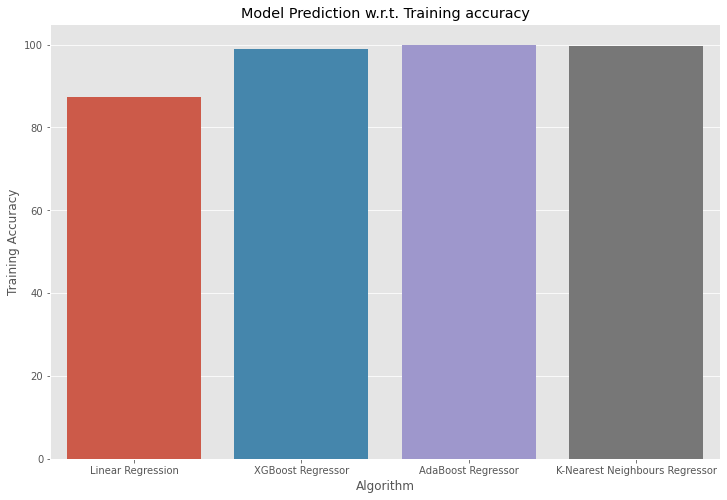

In [56]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='Training Accuracy',data=models)
plt.title("Model Prediction w.r.t. Training accuracy")
plt.show()

### Algorithm vs. Testing Accuracy 

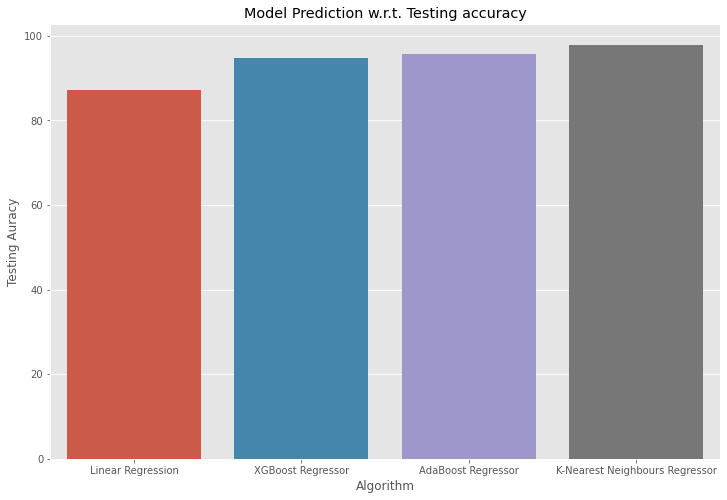

In [57]:
plt.style.use('ggplot') 
plt.figure(figsize=(12,8))
sns.barplot(x='Algorithm',y='Testing Auracy',data=models)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()